## Portfolio Optimization

In this project, portfolio optimization on 9 selected stocks is conducted applying a Monte-Carlo-Simulation. The risk characteristics analyzed are standard deviation, Value at Risk, and Conditional Value at Risk.

The script is divided in several parts:
1. Import Libraries
2. Get and Prepare Relevant Stock Data (2010-2019)
3. Transform Dataframe
4. Plot Stock Development Over Time
5. Monte-Carlo-Simulation
6. Plot Efficient Frontiers
7. Analysis of Portfolios
8. Simulate Portfolios on Test Period (2020-2022)

##### 1. Import Libraries

In [1]:
# import relevant libraries

# for data collection
from datetime import datetime, timedelta
import yfinance as yf

# for simulation 
import random

# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# timer for for-loops
from tqdm import tqdm

##### 2. Get and Prepare Relevant Stock Data (2010-2019)

The relevant tickers for our 9 selected stocks (spread across markets and industries) are the following:

1. PetroChina Company Limited (0857.HK)
2. China Mobile Limited (0941.HK)
3. Tencent Holdings Limited (TCEHY)
4. General Electric Company (GE)
5. Apple Inc. (AAPL)
6. Walmart Inc. (WMT)
7. LVMH Moët Hennessy - Louis Vuitton, Société Européenne (MC.PA)
8. ASML Holding N.V. (ASML)
9. Siemens Aktiengesellschaft (SIE.DE)

In [2]:
# define tickers and time span
tickers = ['0857.HK', '0941.HK', 'TCEHY', 'GE', 'AAPL', 'WMT', 'MC.PA', 'ASML', 'SIE.DE']
start_date = datetime(2010, 1, 1)
end_date = datetime(2019, 12, 31)

In [3]:
# create dataframe with all data
stocks = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    # adjusted closing price because it accounts for dividends, stock splits, etc.
    stocks[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# check dataframe
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2452 entries, 2010-01-04 to 2019-12-30
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0857.HK  2452 non-null   float64
 1   0941.HK  2452 non-null   float64
 2   TCEHY    2390 non-null   float64
 3   GE       2391 non-null   float64
 4   AAPL     2391 non-null   float64
 5   WMT      2391 non-null   float64
 6   MC.PA    2447 non-null   float64
 7   ASML     2391 non-null   float64
 8   SIE.DE   2430 non-null   float64
dtypes: float64(9)
memory usage: 191.6 KB


In [5]:
# check dimensions
stocks.shape

(2452, 9)

In [6]:
# check first entries
stocks.head()

,0857.HK,0941.HK,TCEHY,GE,AAPL,WMT,MC.PA,ASML,SIE.DE
Date,,,,,,,,,
2010-01-04,5.111073,35.461403,NaN,68.035324,6.478997,39.871319,60.207405,24.009943,39.892433
2010-01-05,5.413667,35.755486,4.053074,68.387619,6.490200,39.474304,59.924358,24.196985,39.916813
2010-01-06,5.523701,35.976040,4.080387,68.035324,6.386965,39.386063,60.505783,24.418652,40.063049
2010-01-07,5.501695,35.902527,3.914695,71.558197,6.375156,39.408119,61.194305,23.739779,40.538315
2010-01-08,5.545707,36.490677,3.967497,73.099449,6.417540,39.209614,62.020508,23.171745,40.794231


In [7]:
# change column names to make it easier to understand
stocks.columns = \
['PetroChina Company Limited', \
 'China Mobile Limited', \
 'Tencent Holdings Limited', \
 'General Electric Company', \
 'Apple Inc.', \
 'Walmart Inc.', \
 'LVMH Moët Hennessy (SE)', \
 'ASML Holding N.V.', \
 'Siemens Aktiengesellschaft']

In [8]:
# check how many trading days there are per year
entries_per_year = stocks.resample('Y').size()
print(entries_per_year, '\n')
print('The mean amount of trading days is: ', np.mean(entries_per_year))

Date
2010-12-31    236
2011-12-31    246
2012-12-31    246
2013-12-31    245
2014-12-31    247
2015-12-31    247
2016-12-31    247
2017-12-31    247
2018-12-31    246
2019-12-31    245
Freq: A-DEC, dtype: int64 

The mean amount of trading days is:  245.2


For further processing 252 trading days per year are assumed.

In [9]:
# annualizing factor
days_per_year = 252

In [10]:
# save dataframe to csv
stocks.to_csv('stocks_data.csv')

In [11]:
# load dataframe
# stocks = pd.read_csv('stocks_data.csv', index_col=0)

##### 3. Transform Dataframe

To make a comparison possible the stocks are transformed to percentage returns.

In [12]:
# calculate log returns (advantage: additivity of logs)
log_returns = np.log(stocks/stocks.shift(1)).dropna() # drop first row (=NA)

In [13]:
# save dataframe to csv
log_returns.to_csv('log_returns_data.csv')

In [14]:
# load dataframe
# log_returns = pd.read_csv('log_returns_data.csv', index_col=0)

In [15]:
# check the transformed dataframe
log_returns.head()

,PetroChina Company Limited,China Mobile Limited,Tencent Holdings Limited,General Electric Company,Apple Inc.,Walmart Inc.,LVMH Moët Hennessy (SE),ASML Holding N.V.,Siemens Aktiengesellschaft
Date,,,,,,,,,
2010-01-06,0.020121,0.006149,0.006716,-0.005165,-0.016034,-0.002238,0.009656,0.009119,0.003657
2010-01-07,-0.003992,-0.002045,-0.041454,0.050484,-0.001851,0.000560,0.011315,-0.028195,0.011793
2010-01-08,0.007968,0.016249,0.013398,0.021310,0.006626,-0.005050,0.013411,-0.024218,0.006293
2010-01-11,0.009872,0.005359,0.019541,0.009592,-0.008861,0.016366,0.007741,-0.021454,0.002536
2010-01-12,-0.005912,0.023764,-0.017707,0.000596,-0.011440,0.009546,-0.029186,0.001526,-0.012292


##### 4. Plot Stock Development Over Time

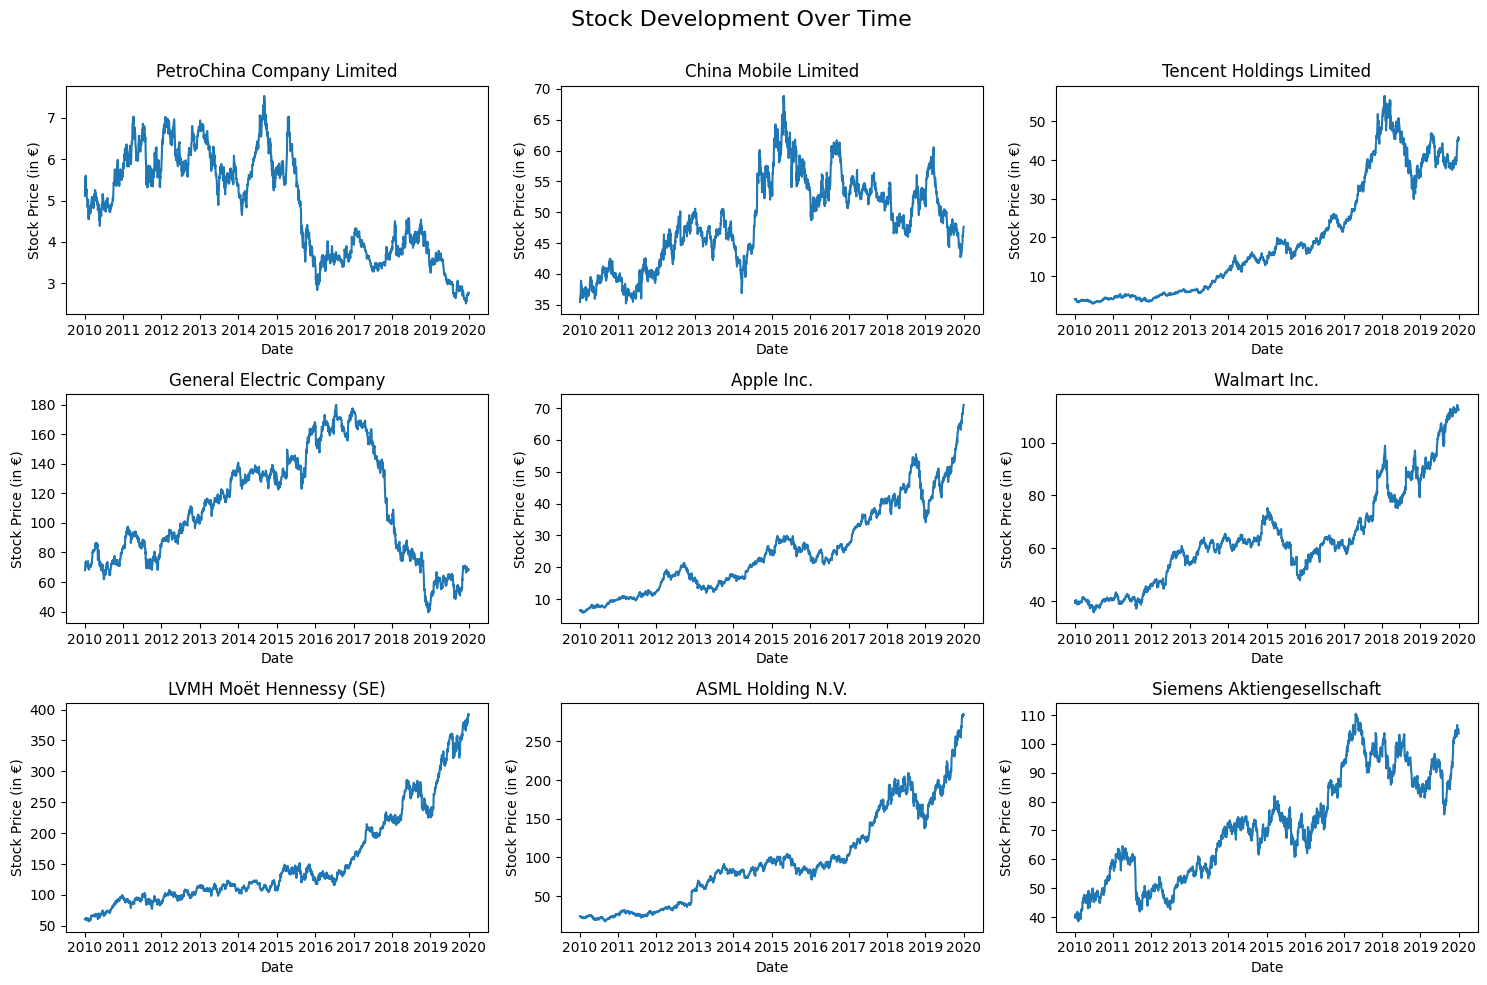

In [16]:
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# loop through stocks and plot each in a separate subplot
for i in range(3):
    for j in range(3):
        stock_name = stocks.columns[i*3+j]
        sns.lineplot(data=stocks[stock_name], ax=axes[i, j])
        x_scaler = int(stocks.iloc[:,[i*3+j]].max())*1.1
        axes[i,j].set_title(stock_name)
        axes[i,j].set_xlabel('Date')
        axes[i,j].set_ylabel('Stock Price (in €)')

# title for the entire set of subplots
fig.suptitle('Stock Development Over Time \n', fontsize=16)

# adjust subplot layout
plt.tight_layout()

# save plot
plt.savefig('Stocks_Development.png')

# show the plot
plt.show()

##### 5. Monte Carlo Simulation

In [17]:
# set all input variables

# set seed for reproducibility
np.random.seed(1)

# number of stocks
num_stocks = stocks.shape[1]

# number of simulations
num_sim = 100000

# confidence level for VaR
confidence_level = 0.95

In [18]:
# calculate the covariane matrix
cov_matrix = log_returns.cov()

In [19]:
# plot the covariance matrix
cov_matrix

,PetroChina Company Limited,China Mobile Limited,Tencent Holdings Limited,General Electric Company,Apple Inc.,Walmart Inc.,LVMH Moët Hennessy (SE),ASML Holding N.V.,Siemens Aktiengesellschaft
PetroChina Company Limited,0.000294,0.000105,0.000091,0.000041,0.000030,0.000007,0.000071,0.000034,0.000059
China Mobile Limited,0.000105,0.000165,0.000060,0.000013,0.000014,0.000007,0.000041,0.000018,0.000031
Tencent Holdings Limited,0.000091,0.000060,0.000457,0.000105,0.000110,0.000047,0.000129,0.000163,0.000101
General Electric Company,0.000041,0.000013,0.000105,0.000290,0.000087,0.000044,0.000094,0.000115,0.000096
Apple Inc.,0.000030,0.000014,0.000110,0.000087,0.000277,0.000039,0.000084,0.000132,0.000069
Walmart Inc.,0.000007,0.000007,0.000047,0.000044,0.000039,0.000120,0.000037,0.000051,0.000033
LVMH Moët Hennessy (SE),0.000071,0.000041,0.000129,0.000094,0.000084,0.000037,0.000279,0.000127,0.000152
ASML Holding N.V.,0.000034,0.000018,0.000163,0.000115,0.000132,0.000051,0.000127,0.000409,0.000107
Siemens Aktiengesellschaft,0.000059,0.000031,0.000101,0.000096,0.000069,0.000033,0.000152,0.000107,0.000207


<AxesSubplot:>

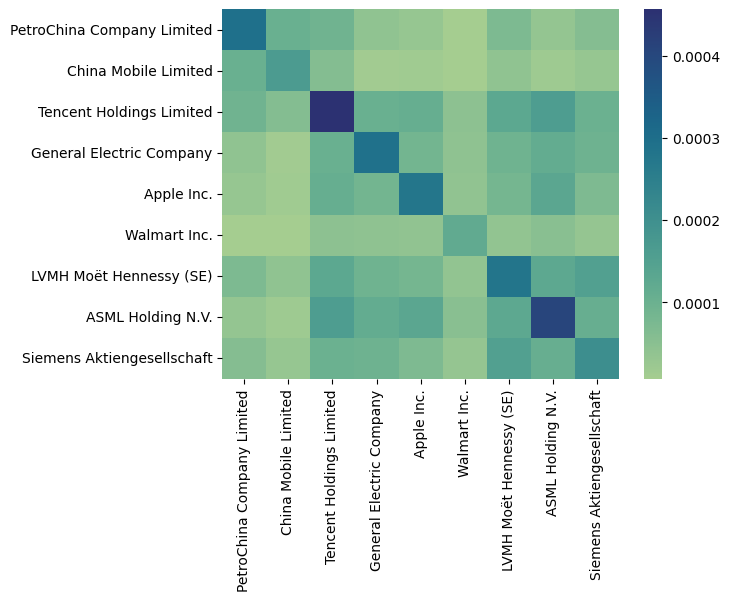

In [20]:
# for better understanding plot as heatmap
sns.heatmap(cov_matrix, cmap="crest")

In [21]:
# save all risk measures in these numpy arrays
weights_all = np.zeros((num_sim,len(stocks.columns)))
expected_return_daily = np.zeros(num_sim)
expected_return_annually = np.zeros(num_sim)
sd_daily = np.zeros(num_sim)
sd_annually = np.zeros(num_sim)
var_daily = np.zeros(num_sim)
var_annually = np.zeros(num_sim)
cvar_daily = np.zeros(num_sim)
cvar_annually = np.zeros(num_sim)

In [22]:
# function to generate weights
# with long and short selling
# generate for each iteration as many random values as stocks
# sum has to be 1
def generate_weights():
    while True:
        weights = [random.uniform(-1, 1) for i in range(num_stocks-1)]
        weights.append(1 - sum(weights))
        if -1 <= weights[-1] <= 1:
            return weights

In [23]:
for simulations in tqdm(range(num_sim)):
    '''
    simulate num_sim times different, random weight portfolios and calculate the respective risk metrics
    '''

    # weights
    # with long and short selling
    # generate for each iteration as many random values as stocks
    weights = generate_weights()

    # create a temporary df to apply weights on the daily log returns
    log_returns_weights = log_returns.copy()
    # apply weights on individual daily returns
    for i in range(log_returns.shape[1]):
        log_returns_weights.iloc[:,i] *= weights[i]
    # combine to only one numpy array
    log_returns_aggregated = log_returns_weights.sum(axis=1)

    # calculate all risk measures for all simulated portfolios and add them to their respective numpy array
    # all measures here are in log-scale
    # daily and annually risk measures

    # weights
    weights_all[simulations,:] = weights
    # expected return daily
    expected_return_daily[simulations] = np.mean(log_returns_aggregated)
    # expected return annually
    expected_return_annually[simulations] = expected_return_daily[simulations]*days_per_year
    # standard deviation daily
    sd_daily[simulations] = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
    # standard deviation annually
    sd_annually[simulations] = sd_daily[simulations]*np.sqrt(days_per_year) 
    # Value at Risk (VaR) daily
    var_daily[simulations] = np.percentile(log_returns_aggregated, 1-confidence_level)
    # Value at Risk (VaR) annually
    var_annually[simulations] = var_daily[simulations]*np.sqrt(days_per_year)
    # Conditional Value at Risk (CVaR) daily
    # find losses below VaR
    losses = [r for r in log_returns_aggregated if r < var_daily[simulations]]
    cvar_daily[simulations] = np.mean(losses)
    # Conditional Value at Risk (CVaR) annually
    cvar_annually[simulations] = cvar_daily[simulations]*np.sqrt(days_per_year)

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [18:25<00:00, 90.45it/s]


##### 6. Plot Efficient Frontier

###### 6.1. Plot Efficient Frontier (Expected Return (Annually) vs. Standard Deviation (Annually))

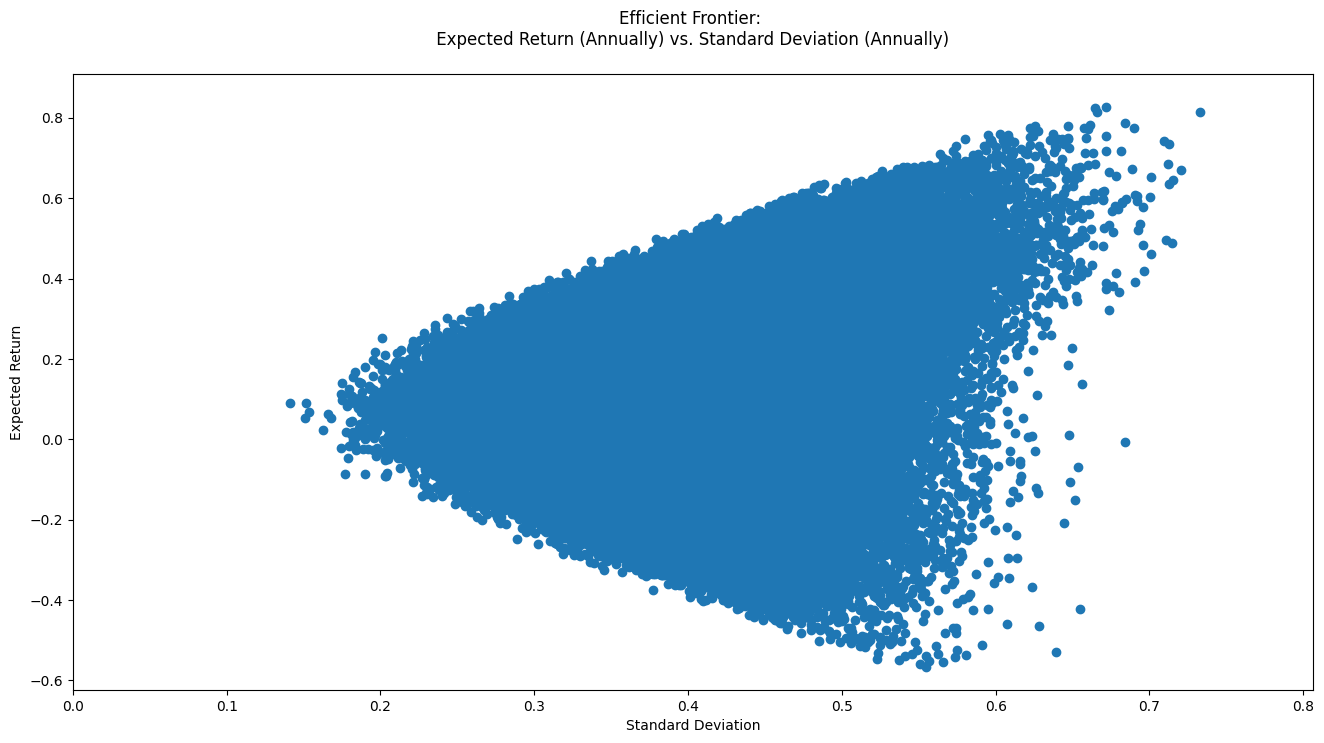

In [24]:
# plot efficient frontier (expected return (annually) vs. standard deviation (annually))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(sd_annually,expected_return_annually)

# set axes ranges
plt.ylim([min(expected_return_annually)*1.1,max(expected_return_annually)*1.1])
plt.xlim([0,max(sd_annually)*1.1])

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Annually) vs. Standard Deviation (Annually) \n')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

# plot
plt.show()

###### 6.1.1. Add Points to Focus On

In [25]:
# decide on points to focus on (on efficient frontier)

# most left point
index_low_sd = np.argmin(sd_annually)

# most right point, maximizing return
index_high_sd = np.argmax(expected_return_annually)

# point with return in between previous two points
# first calculate the return
middle_return = expected_return_annually[index_low_sd] + 0.5*(expected_return_annually[index_high_sd]-expected_return_annually[index_low_sd])
# calculate points that are taking into consideration (some tolerance added)
middle_return_all = np.where(np.abs(expected_return_annually - middle_return) <= 0.015)
# calculate the index where sd is minimized
index_middle_sd = middle_return_all[0][np.argmin(sd_annually[middle_return_all])]

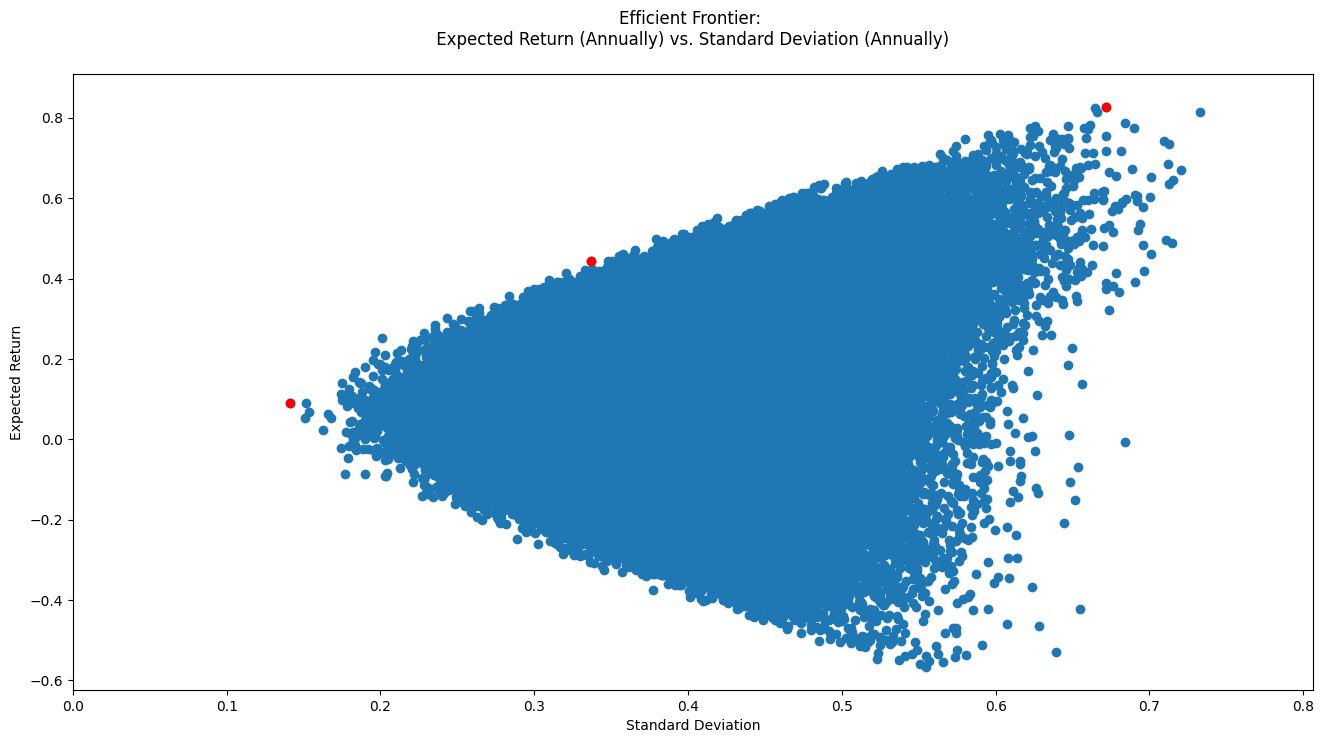

In [26]:
# plot efficient frontier (expected return (annually) vs. standard deviation (annually))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(sd_annually,expected_return_annually)

# set axes ranges
plt.ylim([min(expected_return_annually)*1.1,max(expected_return_annually)*1.1])
plt.xlim([0,max(sd_annually)*1.1])

# add points
plt.scatter(sd_annually[index_low_sd], expected_return_annually[index_low_sd], color='red', label='Low Risk')
plt.scatter(sd_annually[index_middle_sd], expected_return_annually[index_middle_sd], color='red', label='Middle Risk')
plt.scatter(sd_annually[index_high_sd], expected_return_annually[index_high_sd], color='red', label='High Risk')

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Annually) vs. Standard Deviation (Annually) \n')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

# plot
plt.show()

###### 6.2. Plot Efficient Frontier (Expected Return (Annually) vs. Value at Risk (Daily))

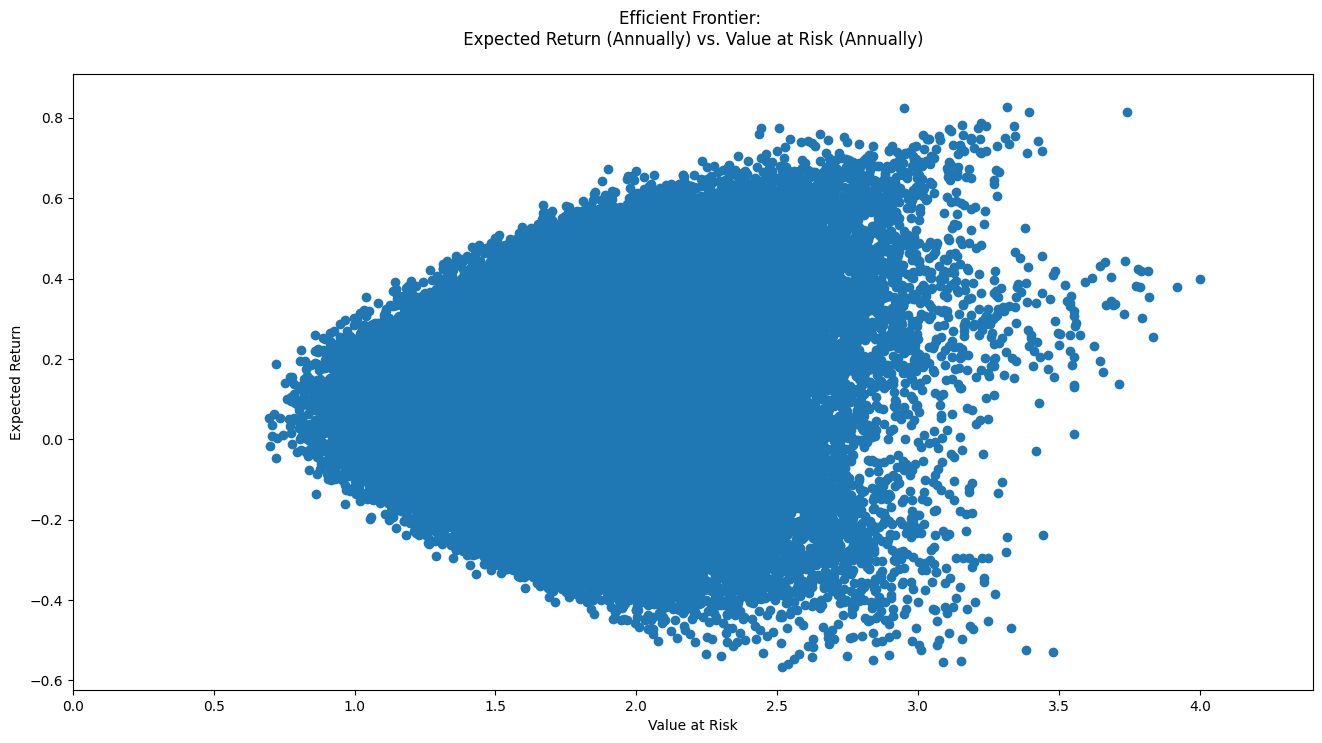

In [27]:
# plot efficient frontier (expected return (annually) vs. VaR (annually))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(-var_annually,expected_return_annually)

# set axes ranges
plt.ylim([min(expected_return_annually)*1.1,max(expected_return_annually)*1.1])
# plt.xlim([min(var_annually)*1.1,0])
plt.xlim([0,max(-var_annually)*1.1])

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Annually) vs. Value at Risk (Annually) \n')
plt.xlabel('Value at Risk')
plt.ylabel('Expected Return')

# plot
plt.show()

###### 6.2.1. Add Points to Focus On

In [28]:
# decide on points to focus on (on efficient frontier)

# most left point (maximize VaR because losses are negative)
index_low_var = np.argmax(var_annually)

# most right point, maximizing return
index_high_var = np.argmax(expected_return_annually)

# point with return in between previous two points
# first calculate the return
middle_return = expected_return_annually[index_low_var] + 0.5*(expected_return_annually[index_high_var]-expected_return_annually[index_low_var])
# calculate points that are taking into consideration (some tolerance added)
middle_return_all = np.where(np.abs(expected_return_annually - middle_return) <= 0.015)
# calculate the index where VaR is maximized (losses are negative)
index_middle_var = middle_return_all[0][np.argmax(var_annually[middle_return_all])]

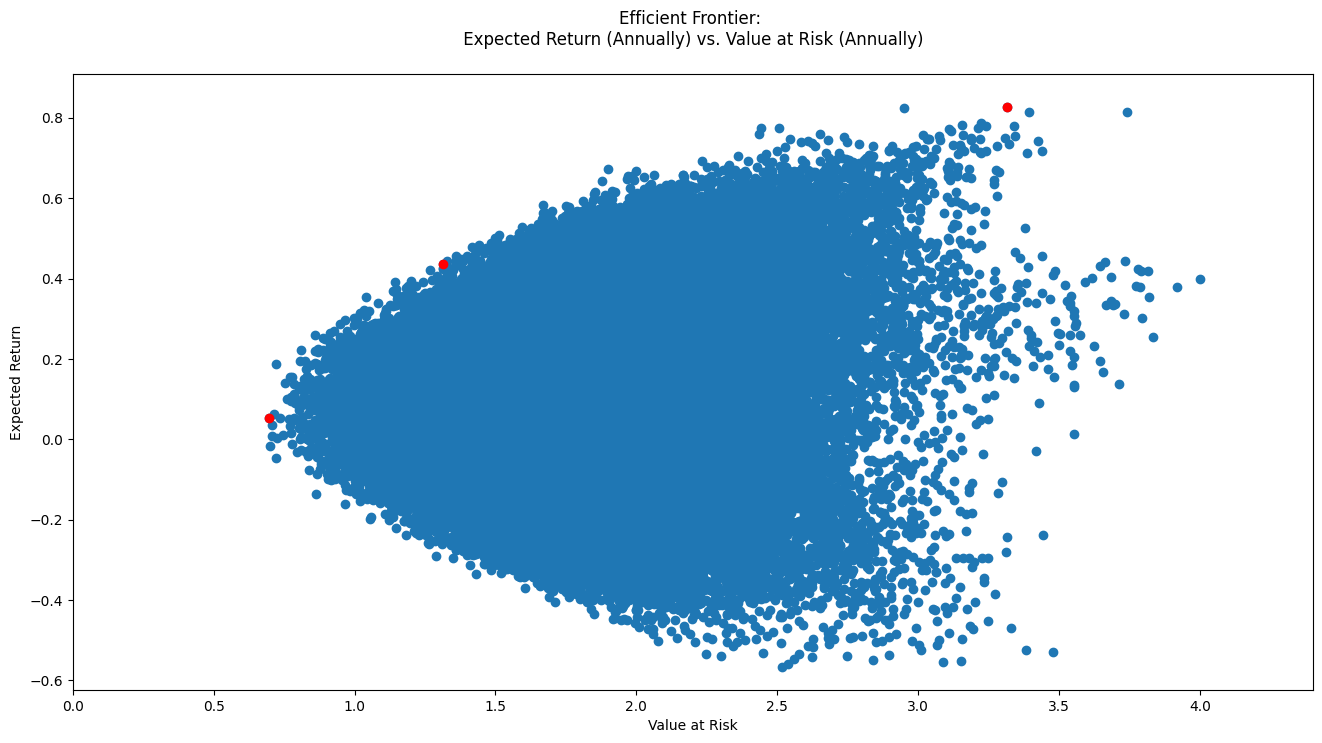

In [29]:
# plot efficient frontier (expected return (annually) vs. VaR (annually))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(-var_annually,expected_return_annually)

# set axes ranges
plt.ylim([min(expected_return_annually)*1.1,max(expected_return_annually)*1.1])
# plt.xlim([min(var_annually)*1.1,0])
plt.xlim([0,max(-var_annually)*1.1])

# add points
plt.scatter(-var_annually[index_low_var], expected_return_annually[index_low_var], color='red', label='Low Risk')
plt.scatter(-var_annually[index_middle_var], expected_return_annually[index_middle_var], color='red', label='Middle Risk')
plt.scatter(-var_annually[index_high_var], expected_return_annually[index_high_var], color='red', label='High Risk')

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Annually) vs. Value at Risk (Annually) \n')
plt.xlabel('Value at Risk')
plt.ylabel('Expected Return')

# plot
plt.show()

###### 6.3. Plot Efficient Frontier (Expected Return (Annually) vs. Conditional Value at Risk (Daily))

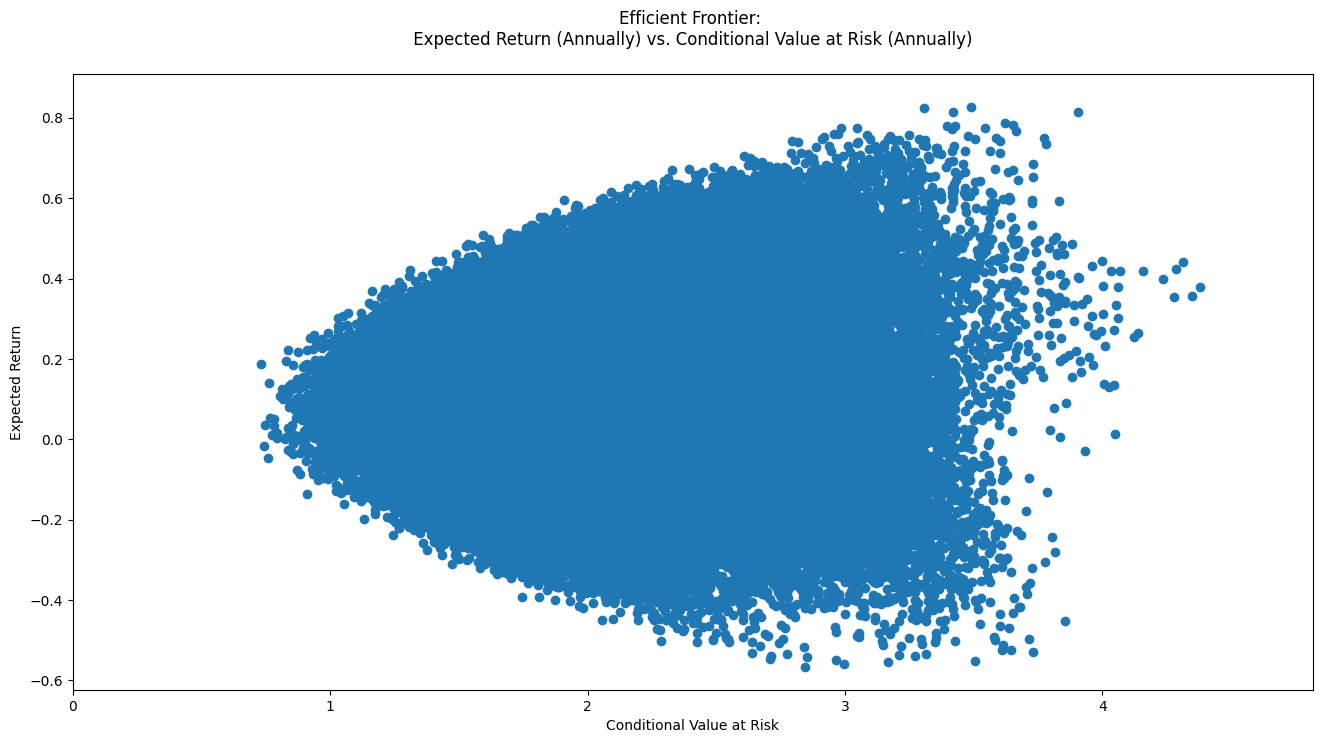

In [30]:
# plot efficient frontier (expected return (annually) vs. CVaR (annually))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(-cvar_annually,expected_return_annually)

# set axes ranges
plt.ylim([min(expected_return_annually)*1.1,max(expected_return_annually)*1.1])
# plt.xlim([min(cvar_annually)*1.1,0])
plt.xlim([0,max(-cvar_annually)*1.1])

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Annually) vs. Conditional Value at Risk (Annually) \n')
plt.xlabel('Conditional Value at Risk')
plt.ylabel('Expected Return')

# plot
plt.show()

###### 6.3.1. Add Points to Focus On

In [31]:
# decide on points to focus on (on efficient frontier)

# most left point (maximize CVaR because losses are negative)
index_low_cvar = np.argmax(cvar_annually)

# most right point, maximizing return
index_high_cvar = np.argmax(expected_return_annually)

# point with return in between previous two points
# first calculate the return
middle_return = expected_return_annually[index_low_cvar] + 0.5*(expected_return_annually[index_high_cvar]-expected_return_annually[index_low_cvar])
# calculate points that are taking into consideration (some tolerance added)
middle_return_all = np.where(np.abs(expected_return_annually - middle_return) <= 0.015)
# calculate the index where VaR is maximized (losses are negative)
index_middle_cvar = middle_return_all[0][np.argmax(cvar_annually[middle_return_all])]

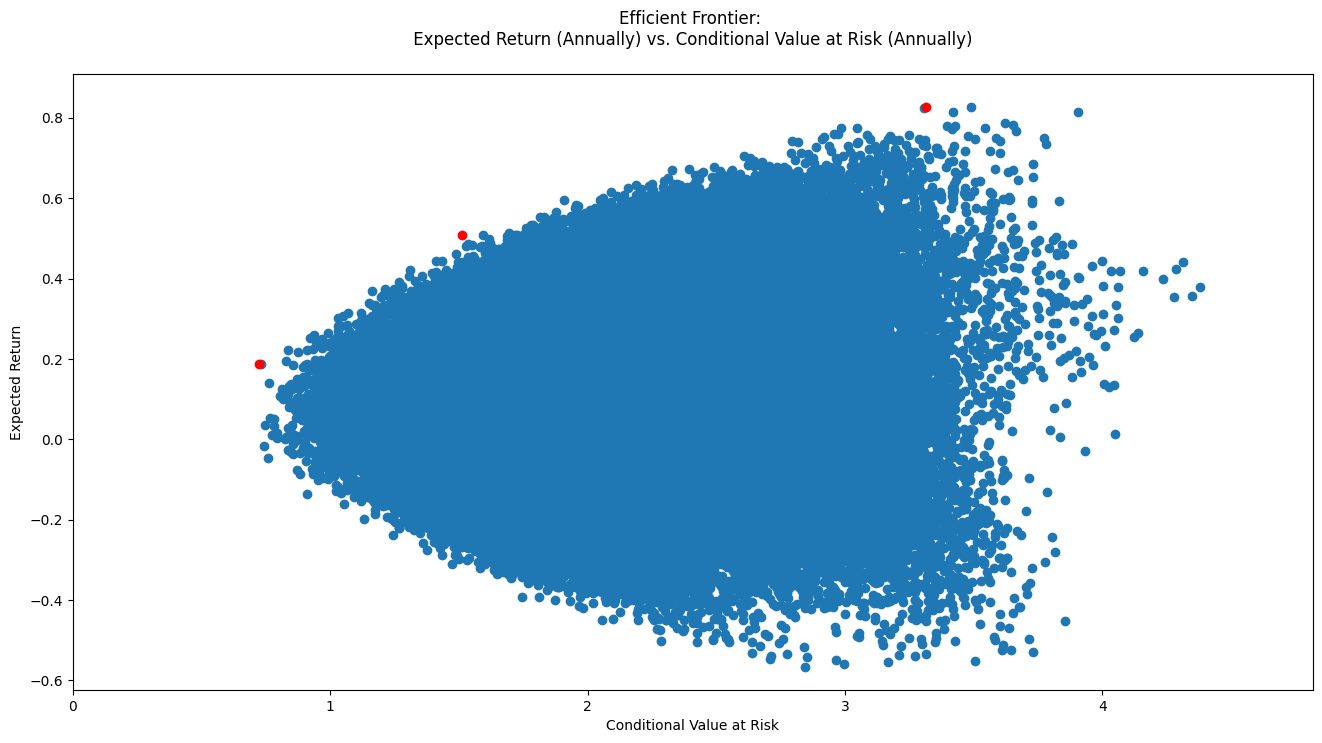

In [32]:
# plot efficient frontier (expected return (annually) vs. CVaR (annually))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(-cvar_annually,expected_return_annually)

# set axes ranges
plt.ylim([min(expected_return_annually)*1.1,max(expected_return_annually)*1.1])
# plt.xlim([min(cvar_annually)*1.1,0])
plt.xlim([0,max(-cvar_annually)*1.1])

# add points
plt.scatter(-var_annually[index_low_cvar], expected_return_annually[index_low_cvar], color='red', label='Low Risk')
plt.scatter(-var_annually[index_middle_cvar], expected_return_annually[index_middle_cvar], color='red', label='Middle Risk')
plt.scatter(-var_annually[index_high_cvar], expected_return_annually[index_high_cvar], color='red', label='High Risk')

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Annually) vs. Conditional Value at Risk (Annually) \n')
plt.xlabel('Conditional Value at Risk')
plt.ylabel('Expected Return')

# plot
plt.show()

##### 7. Analysis of Portfolios

Analyze the risk properties of all points identified

In [33]:
# based on standard deviation
print("\n Risk Properties of Low Point: \n", \
     "Weights: ", np.round(weights_all[index_low_sd],4), \
     "\n Expected Return: ", expected_return_annually[index_low_sd], \
     "\n Standard Deviation: ", sd_annually[index_low_sd], \
     "\n VaR: ", var_annually[index_low_sd], \
     "\n CVaR: ", cvar_annually[index_low_sd])

print("\n Risk Properties of Middle Point: \n", \
     "Weights: ", np.round(weights_all[index_middle_sd],4), \
     "\n Expected Return: ", expected_return_annually[index_middle_sd], \
     "\n Standard Deviation: ", sd_annually[index_middle_sd], \
     "\n VaR: ", var_annually[index_middle_sd], \
     "\n CVaR: ", cvar_annually[index_middle_sd])

print("\n Risk Properties of High Point: \n", \
     "Weights: ", np.round(weights_all[index_high_sd],4), \
     "\n Expected Return: ", expected_return_annually[index_high_sd], \
     "\n Standard Deviation: ", sd_annually[index_high_sd], \
     "\n VaR: ", var_annually[index_high_sd], \
     "\n CVaR: ", cvar_annually[index_high_sd])


 Risk Properties of Low Point: 
 Weights:  [ 0.0433  0.1535 -0.0121 -0.113   0.1965  0.6192 -0.1244 -0.0189  0.2558] 
 Expected Return:  0.08948846544753951 
 Standard Deviation:  0.14086538409171454 
 VaR:  -0.8365346209733605 
 CVaR:  -0.9968880036978398

 Risk Properties of Middle Point: 
 Weights:  [-0.5208  0.2941  0.5199 -0.6401  0.4687  0.1288  0.4991  0.1608  0.0894] 
 Expected Return:  0.44329167972947586 
 Standard Deviation:  0.33684265374469546 
 VaR:  -1.3291172208911697 
 CVaR:  -1.5336592211086049

 Risk Properties of High Point: 
 Weights:  [-0.9901 -0.6423  0.7905 -0.9519  0.7998  0.1851  0.5915  0.9765  0.2409] 
 Expected Return:  0.8268671849969879 
 Standard Deviation:  0.6716320543870348 
 VaR:  -3.3165758439771698 
 CVaR:  -3.4906518435708045


In [34]:
# based on VaR
print("\n Risk Properties of Low Point: \n", \
     "Weights: ", np.round(weights_all[index_low_var],4), \
     "\n Expected Return: ", expected_return_annually[index_low_var], \
     "\n Standard Deviation: ", sd_annually[index_low_var], \
     "\n VaR: ", var_annually[index_low_var], \
     "\n CVaR: ", cvar_annually[index_low_var])

print("\n Risk Properties of Middle Point: \n", \
     "Weights: ", np.round(weights_all[index_middle_var],4), \
     "\n Expected Return: ", expected_return_annually[index_middle_var], \
     "\n Standard Deviation: ", sd_annually[index_middle_var], \
     "\n VaR: ", var_annually[index_middle_var], \
     "\n CVaR: ", cvar_annually[index_middle_var])

print("\n Risk Properties of High Point: \n", \
     "Weights: ", np.round(weights_all[index_high_var],4), \
     "\n Expected Return: ", expected_return_annually[index_high_var], \
     "\n Standard Deviation: ", sd_annually[index_high_var], \
     "\n VaR: ", var_annually[index_high_var], \
     "\n CVaR: ", cvar_annually[index_high_var])


 Risk Properties of Low Point: 
 Weights:  [-0.0745  0.4604  0.1463  0.2406 -0.11    0.3352  0.0184 -0.0804  0.0639] 
 Expected Return:  0.05407969415202684 
 Standard Deviation:  0.15115567902194219 
 VaR:  -0.6945457109747281 
 CVaR:  -0.865361969157497

 Risk Properties of Middle Point: 
 Weights:  [-0.5197  0.4145  0.4974 -0.6395  0.4299 -0.2416  0.2506  0.2978  0.5105] 
 Expected Return:  0.43569058566147 
 Standard Deviation:  0.3517342685728582 
 VaR:  -1.3122191138565351 
 CVaR:  -1.5293799779952935

 Risk Properties of High Point: 
 Weights:  [-0.9901 -0.6423  0.7905 -0.9519  0.7998  0.1851  0.5915  0.9765  0.2409] 
 Expected Return:  0.8268671849969879 
 Standard Deviation:  0.6716320543870348 
 VaR:  -3.3165758439771698 
 CVaR:  -3.4906518435708045


In [35]:
# based on CVaR
print("\n Risk Properties of Low Point: \n", \
     "Weights: ", np.round(weights_all[index_low_cvar],4), \
     "\n Expected Return: ", expected_return_annually[index_low_cvar], \
     "\n Standard Deviation: ", sd_annually[index_low_cvar], \
     "\n VaR: ", var_annually[index_low_cvar], \
     "\n CVaR: ", cvar_annually[index_low_cvar])

print("\n Risk Properties of Middle Point: \n", \
     "Weights: ", np.round(weights_all[index_middle_cvar],4), \
     "\n Expected Return: ", expected_return_annually[index_middle_cvar], \
     "\n Standard Deviation: ", sd_annually[index_middle_cvar], \
     "\n VaR: ", var_annually[index_middle_cvar], \
     "\n CVaR: ", cvar_annually[index_middle_cvar])

print("\n Risk Properties of High Point: \n", \
     "Weights: ", np.round(weights_all[index_high_cvar],4), \
     "\n Expected Return: ", expected_return_annually[index_high_cvar], \
     "\n Standard Deviation: ", sd_annually[index_high_cvar], \
     "\n VaR: ", var_annually[index_high_cvar], \
     "\n CVaR: ", cvar_annually[index_high_cvar])


 Risk Properties of Low Point: 
 Weights:  [-0.1055  0.443   0.0386 -0.298   0.0838  0.3382  0.0325  0.4696 -0.0023] 
 Expected Return:  0.1860973266703743 
 Standard Deviation:  0.1996869678966033 
 VaR:  -0.7223137780641862 
 CVaR:  -0.7318225291701989

 Risk Properties of Middle Point: 
 Weights:  [-0.9864  0.6295  0.6232 -0.7762  0.1246  0.7578  0.982   0.108  -0.4625] 
 Expected Return:  0.5089040400233142 
 Standard Deviation:  0.43337258350076807 
 VaR:  -1.51243131697923 
 CVaR:  -1.5918486651762003

 Risk Properties of High Point: 
 Weights:  [-0.9901 -0.6423  0.7905 -0.9519  0.7998  0.1851  0.5915  0.9765  0.2409] 
 Expected Return:  0.8268671849969879 
 Standard Deviation:  0.6716320543870348 
 VaR:  -3.3165758439771698 
 CVaR:  -3.4906518435708045


##### 8. Simulate these portfolios on Test Period (2020-2022)

##### 8.1. Create Dataframe for Test Period (Same Procedure as Before)

In [36]:
# define tickers and time span
tickers = ['0857.HK', '0941.HK', 'TCEHY', 'GE', 'AAPL', 'WMT', 'MC.PA', 'ASML', 'SIE.DE']
start_date = datetime(2020, 1, 1)
end_date = datetime(2022, 12, 31)

# create dataframe with all data
stocks_test = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    # adjusted closing price because it accounts for dividends, stock splits, etc.
    stocks_test[ticker] = data['Adj Close']
    
# change column names to make it easier to understand
stocks_test.columns = \
['PetroChina Company Limited', \
 'China Mobile Limited', \
 'Tencent Holdings Limited', \
 'General Electric Company', \
 'Apple Inc.', \
 'Walmart Inc.', \
 'LVMH Moët Hennessy (SE)', \
 'ASML Holding N.V.', \
 'Siemens Aktiengesellschaft']

# calculate log returns (advantage: additivity of logs)
log_returns_test = np.log(stocks/stocks.shift(1)).dropna() # drop first row (=NA)

# save dataframes to csv
stocks_test.to_csv('stocks_data_test.csv')
log_returns_test.to_csv('log_returns_test.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


##### 8.2. Plot the Test Period

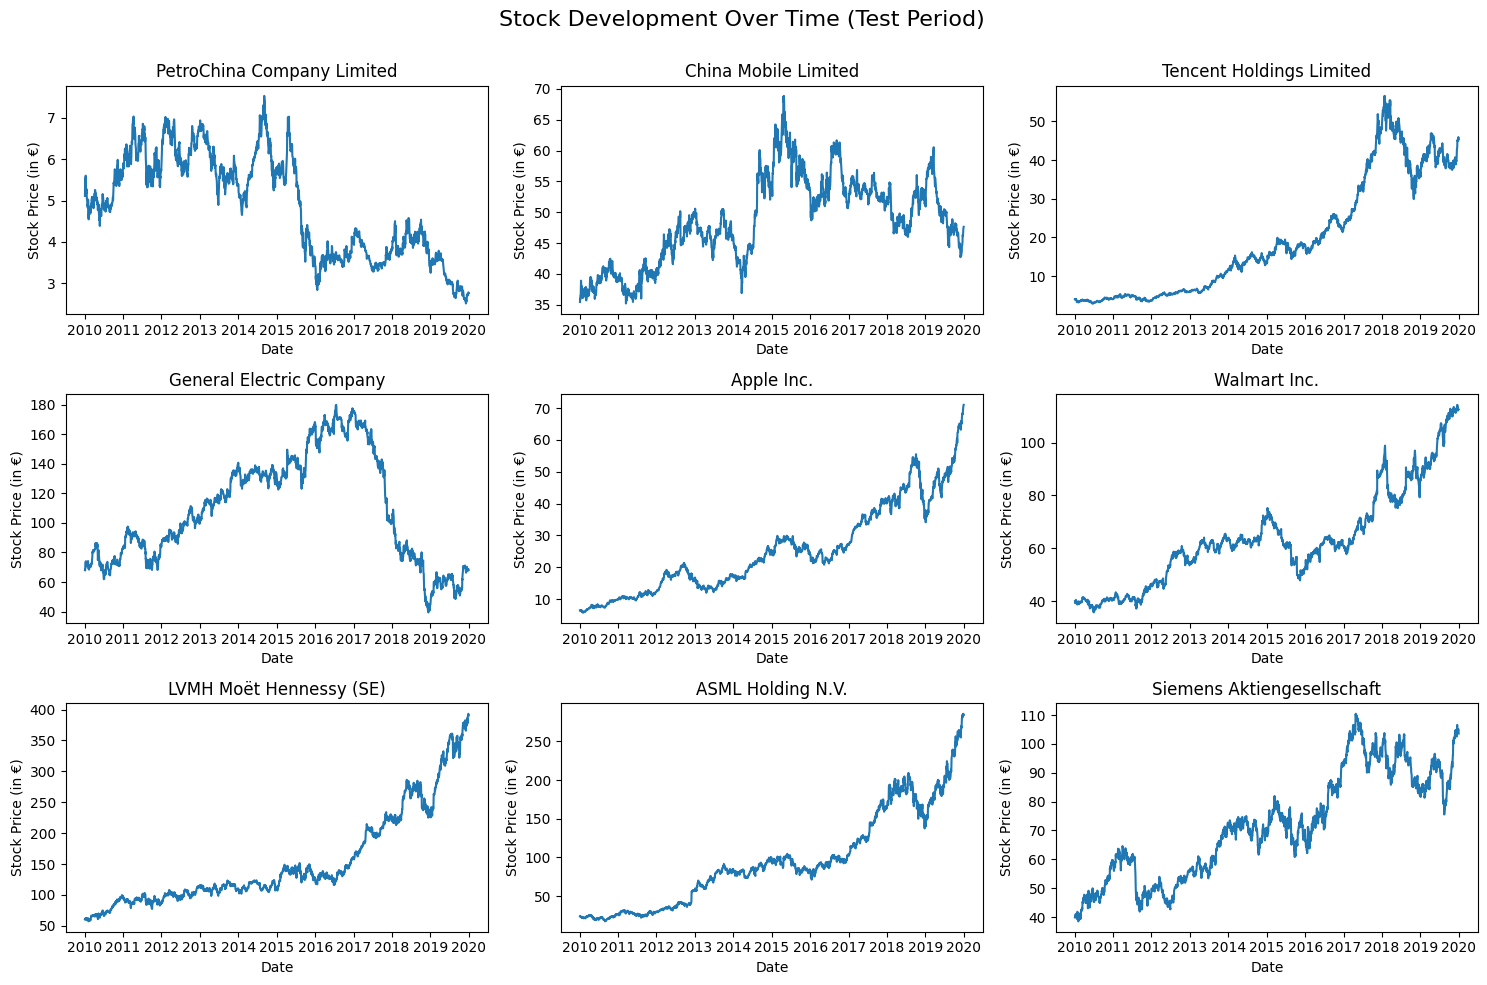

In [37]:
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# loop through stocks and plot each in a separate subplot
for i in range(3):
    for j in range(3):
        stock_name = stocks.columns[i*3+j]
        sns.lineplot(data=stocks[stock_name], ax=axes[i, j])
        
        # show only the years as the x-ticks
        axes[i, j].xaxis.set_major_locator(mdates.YearLocator())
        axes[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        
        x_scaler = int(stocks.iloc[:,[i*3+j]].max())*1.1
        axes[i,j].set_title(stock_name)
        axes[i,j].set_xlabel('Date')
        axes[i,j].set_ylabel('Stock Price (in €)')

# title for the entire set of subplots
fig.suptitle('Stock Development Over Time (Test Period) \n', fontsize=16)

# adjust subplot layout
plt.tight_layout()

# save plot
plt.savefig('Stocks_Development_Test.png')

# show the plot
plt.show()

In [38]:
# number of portfolios
num_portfolios = 9

In [39]:
# save all risk measures in these numpy arrays
weights_all_test = np.array([np.round(weights_all[index_low_sd],4), \
                            np.round(weights_all[index_middle_sd],4), \
                            np.round(weights_all[index_high_sd],4), \
                            np.round(weights_all[index_low_var],4), \
                            np.round(weights_all[index_middle_var],4), \
                            np.round(weights_all[index_high_var],4), \
                            np.round(weights_all[index_low_cvar],4), \
                            np.round(weights_all[index_middle_cvar],4), \
                            np.round(weights_all[index_high_cvar],4),])
realized_return_daily_test = np.zeros(num_portfolios)
realized_return_annually_test = np.zeros(num_portfolios)
sd_daily_test = np.zeros(num_portfolios)
sd_annually_test = np.zeros(num_portfolios)
var_daily_test = np.zeros(num_portfolios)
var_annually_test = np.zeros(num_portfolios)
cvar_daily_test = np.zeros(num_portfolios)
cvar_annually_test = np.zeros(num_portfolios)

In [40]:
for val in range(num_portfolios):
    '''
    validate for all portfolios times different and calculate the respective risk metrics
    '''

    # create a temporary df to apply weights on the daily log returns
    log_returns_weights = log_returns_test.copy()
    # apply weights on individual daily returns
    for i in range(log_returns_test.shape[1]):
        log_returns_weights.iloc[:,i] *= weights_all_test[val][i]
    # combine to only one numpy array
    log_returns_aggregated = log_returns_weights.sum(axis=1)

    # calculate all risk measures for all portfolios and add them to their respective numpy array
    # all measures here are in log-scale
    # daily and annually risk measures

    # expected return daily
    realized_return_daily_test[val] = np.mean(log_returns_aggregated)
    # expected return annually
    realized_return_annually_test[val] = realized_return_daily_test[val]*days_per_year
    # standard deviation daily
    sd_daily_test[val] = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
    # standard deviation annually
    sd_annually_test[val] = sd_daily_test[val]*np.sqrt(days_per_year) 
    # Value at Risk (VaR) daily
    var_daily_test[val] = np.percentile(log_returns_aggregated, 1-confidence_level)
    # Value at Risk (VaR) annually
    var_annually_test[val] = var_daily_test[val]*np.sqrt(days_per_year)
    # Conditional Value at Risk (CVaR) daily
    # find losses below VaR
    losses = [r for r in log_returns_aggregated if r < var_daily_test[val]]
    cvar_daily_test[val] = np.mean(losses)
    # Conditional Value at Risk (CVaR) annually
    cvar_annually_test[val] = cvar_daily_test[val]*np.sqrt(days_per_year)

In [41]:
# print all properties of the test period

descriptions = ["\n Risk Properties of Low Point (Based on Standard Deviation): \n", \
               "\n Risk Properties of Middle Point (Based on Standard Deviation): \n", \
               "\n Risk Properties of High Point (Based on Standard Deviation): \n", \
               "\n Risk Properties of Low Point (Based on VaR): \n", \
               "\n Risk Properties of Middle Point (Based on VaR): \n", \
               "\n Risk Properties of High Point (Based on VaR): \n", \
               "\n Risk Properties of Low Point (Based on CVaR): \n", \
               "\n Risk Properties of Middle Point (Based on CVaR): \n", \
               "\n Risk Properties of High Point (Based on CVaR): \n"]

for i in range(num_portfolios):
    print(descriptions[i], \
          "Weights: ", weights_all_test[i], \
          "\n Expected Return: ", realized_return_annually_test[i], \
          "\n Standard Deviation: ", sd_annually_test[i], \
          "\n VaR: ", var_annually_test[i], \
          "\n CVaR: ", cvar_annually_test[i])


 Risk Properties of Low Point (Based on Standard Deviation): 
 Weights:  [ 0.0433  0.1535 -0.0121 -0.113   0.1965  0.6192 -0.1244 -0.0189  0.2558] 
 Expected Return:  0.08947763777394246 
 Standard Deviation:  0.4501155228552693 
 VaR:  -0.8364906223955142 
 CVaR:  -0.9968228484018401

 Risk Properties of Middle Point (Based on Standard Deviation): 
 Weights:  [-0.5208  0.2941  0.5199 -0.6401  0.4687  0.1288  0.4991  0.1608  0.0894] 
 Expected Return:  0.4432959589620582 
 Standard Deviation:  0.4501155228552693 
 VaR:  -1.3291325553103388 
 CVaR:  -1.5337009268582529

 Risk Properties of High Point (Based on Standard Deviation): 
 Weights:  [-0.9901 -0.6423  0.7905 -0.9519  0.7998  0.1851  0.5915  0.9765  0.2409] 
 Expected Return:  0.8268606325414911 
 Standard Deviation:  0.4501155228552693 
 VaR:  -3.316529689791262 
 CVaR:  -3.490626901651389

 Risk Properties of Low Point (Based on VaR): 
 Weights:  [-0.0745  0.4604  0.1463  0.2406 -0.11    0.3352  0.0184 -0.0804  0.0639] 
 Expe